In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

In [2]:
#importing the Tesla Stock Dataset
tesla_stockdata = pd.read_csv('D:\\kaggle\\TeslaStockData\\TSLA.csv')
tesla_stockdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tesla_stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
Date         2416 non-null object
Open         2416 non-null float64
High         2416 non-null float64
Low          2416 non-null float64
Close        2416 non-null float64
Adj Close    2416 non-null float64
Volume       2416 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
tesla_stockdata.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
tesla_stockdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
tesla_stockdata['Date'] = pd.to_datetime(tesla_stockdata['Date'])
tesla_stockdata.set_index("Date", inplace = True)

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


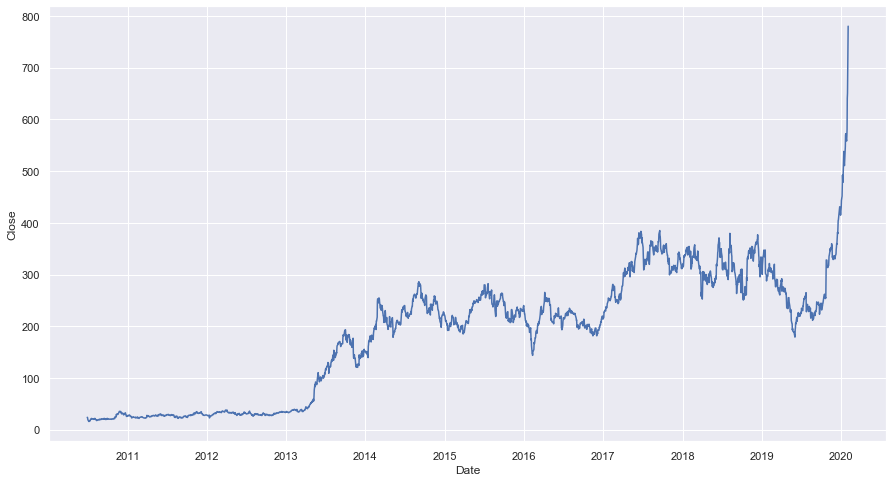

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(tesla_stockdata.index,tesla_stockdata['Close'])

In [8]:
tesla_stockdata['Daily Lag'] = tesla_stockdata['Close'].shift(1)
tesla_stockdata.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.889999
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.830000
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,21.959999
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,19.200001


In [9]:
tesla_stockdata['Daily Returns'] = (tesla_stockdata['Daily Lag']/tesla_stockdata['Close']) -1
tesla_stockdata.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
Date,,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.889999,0.002518
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.830000,0.085155
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,21.959999,0.143750
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,19.200001,0.191806


In [10]:
tesla_stockdata.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2415.000000,2415.000000
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,186.157855,-0.000915
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,118.546390,0.032459
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,15.800000,-0.196110
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,34.400002,-0.017792
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06,212.960007,-0.000869
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06,266.724991,0.014382
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,650.570007,0.239579


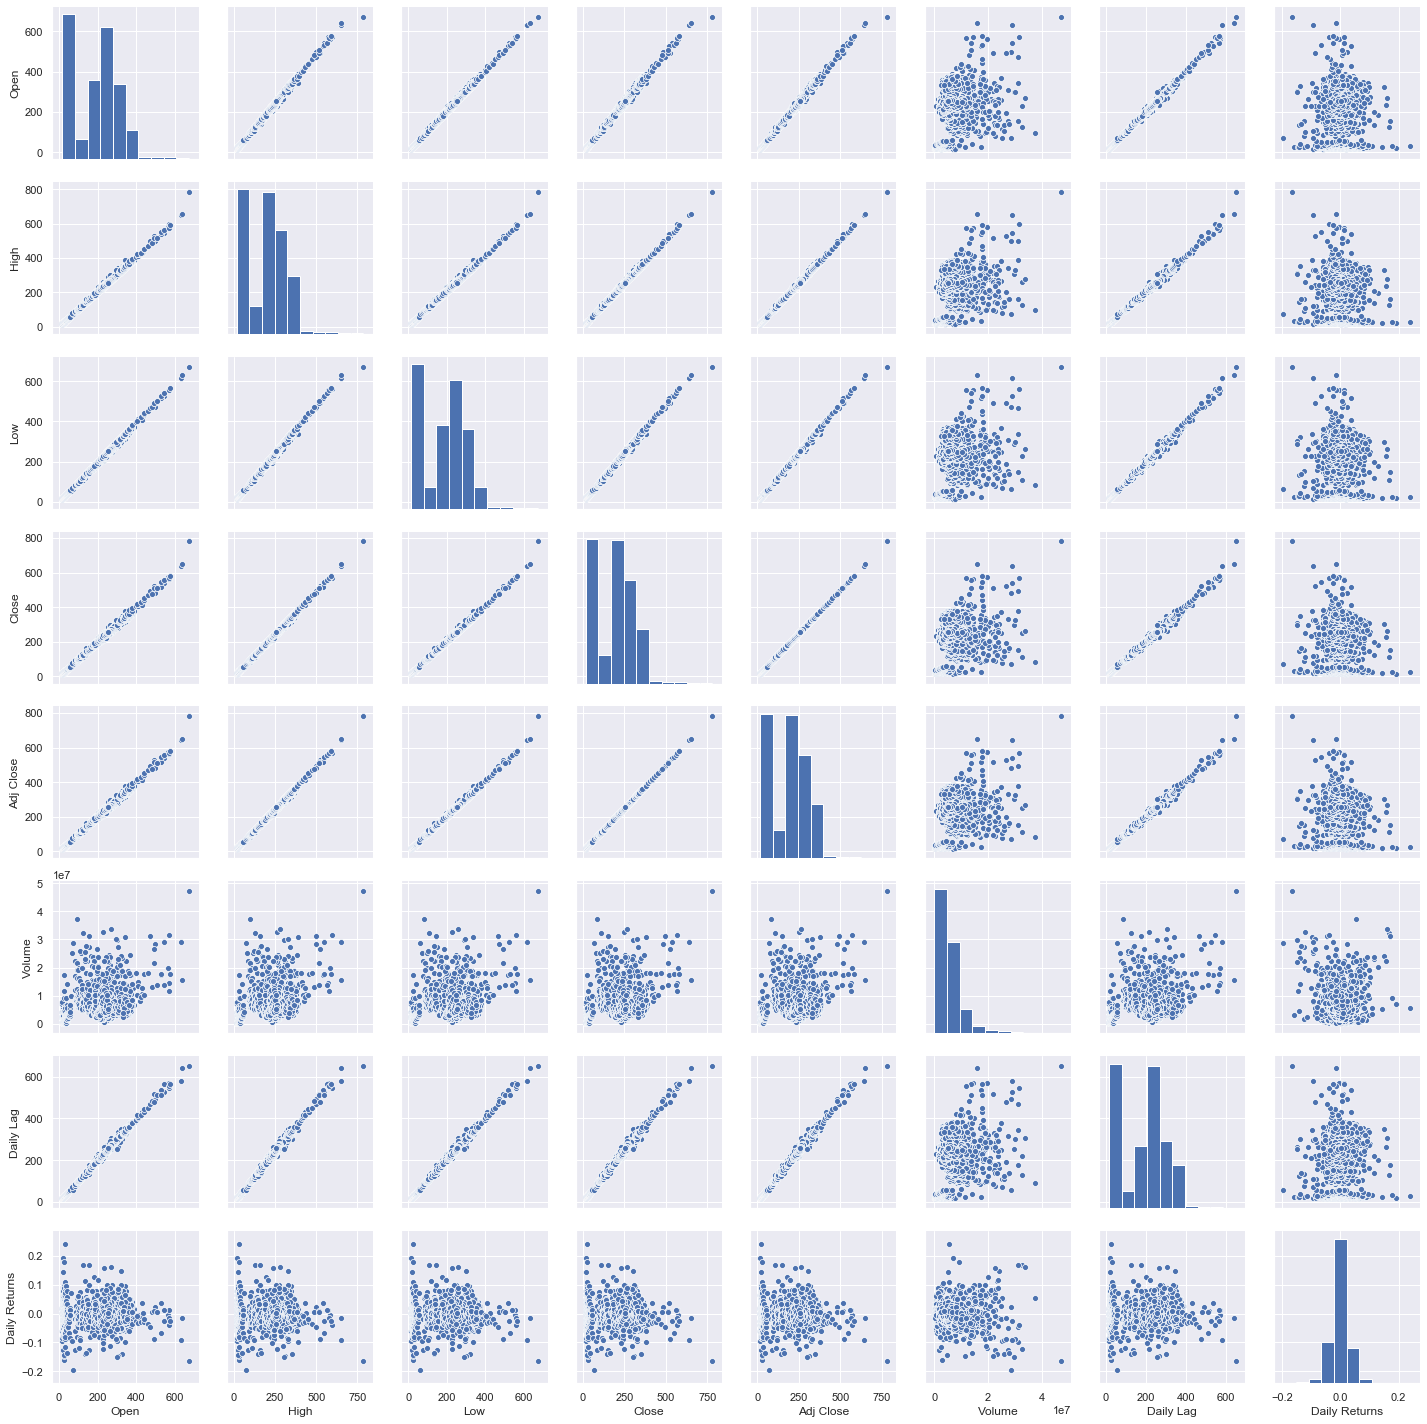

In [11]:
sns.pairplot(tesla_stockdata[1:])

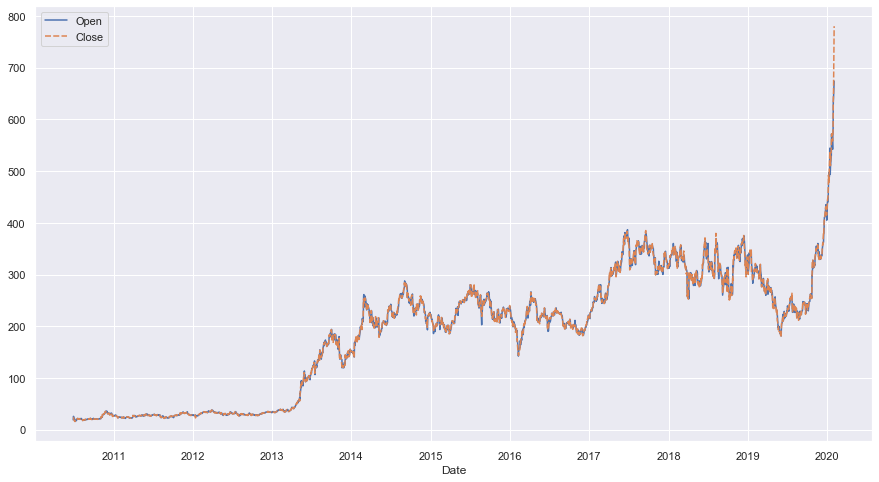

In [12]:
stocks = pd.DataFrame({'Open':tesla_stockdata['Open'],'Close':tesla_stockdata['Close']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

<Figure size 432x288 with 0 Axes>

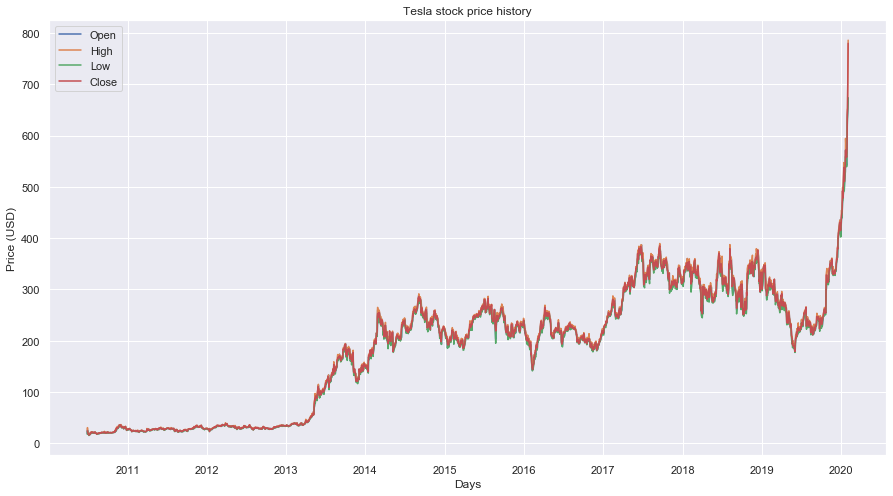

In [13]:
plt.figure()
plt.figure(figsize=(15,8))
plt.plot(tesla_stockdata["Open"])
plt.plot(tesla_stockdata["High"])
plt.plot(tesla_stockdata["Low"])
plt.plot(tesla_stockdata["Close"])
plt.title('Tesla stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

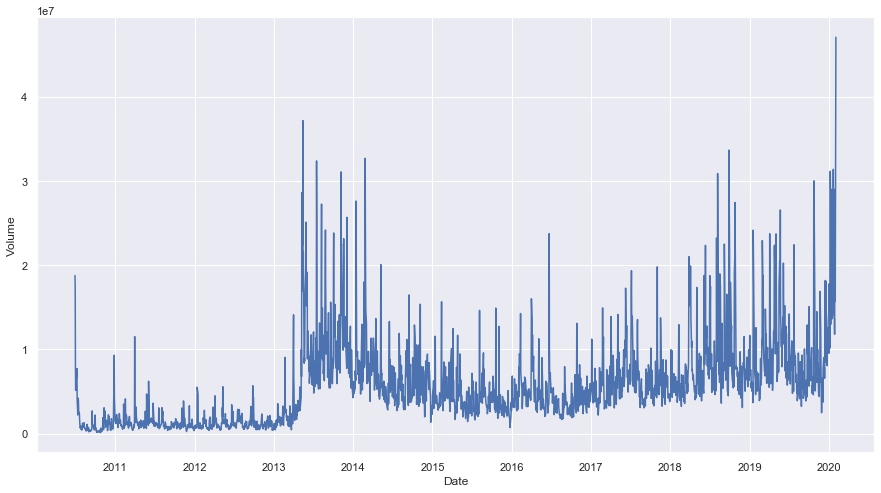

In [14]:
#volume
plt.figure(figsize=(15,8))
sns.lineplot(tesla_stockdata.index,tesla_stockdata['Volume'])

In [15]:
# Comparing Tesla Stock data with competitor vehicle manufacturer 
# like General Motors (US company) and Volkswagen (Foreign)
import pandas_datareader as web
import datetime
 
# We will look at stock prices over the past year, starting at JUne 30, 2010
start = datetime.datetime(2010,6,30)
end = datetime.datetime(2020,2,3)

# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
volkswagen_stockdata = web.DataReader("VWAGY", "yahoo", start, end)
generalmotors_stockdata = web.DataReader("GM", "yahoo", start, end)

In [16]:
volkswagen_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,8.645,8.485,8.525,8.575,35334.0,6.124079
2010-06-30,8.675,8.525,8.595,8.575,15054.0,6.124079
2010-07-01,8.700,8.515,8.690,8.700,39376.0,6.213351
2010-07-02,8.725,8.530,8.575,8.650,9330.0,6.177642
2010-07-06,8.850,8.700,8.700,8.775,13084.0,6.266915


In [17]:
generalmotors_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.474590
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.528797
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.389408
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.746712
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.924818


In [18]:
volkswagen_stockdata['Daily Lag'] = volkswagen_stockdata['Close'].shift(1)
volkswagen_stockdata['Daily Returns'] = (volkswagen_stockdata['Daily Lag']/volkswagen_stockdata['Close']) -1
volkswagen_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
Date,,,,,,,,
2010-06-29,8.645,8.485,8.525,8.575,35334.0,6.124079,NaN,NaN
2010-06-30,8.675,8.525,8.595,8.575,15054.0,6.124079,8.575,0.000000
2010-07-01,8.700,8.515,8.690,8.700,39376.0,6.213351,8.575,-0.014368
2010-07-02,8.725,8.530,8.575,8.650,9330.0,6.177642,8.700,0.005780
2010-07-06,8.850,8.700,8.700,8.775,13084.0,6.266915,8.650,-0.014245


In [19]:
generalmotors_stockdata['Daily Lag'] = generalmotors_stockdata['Close'].shift(1)
generalmotors_stockdata['Daily Returns'] = (generalmotors_stockdata['Daily Lag']/generalmotors_stockdata['Close']) -1
generalmotors_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
Date,,,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.474590,NaN,NaN
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.528797,34.189999,-0.002043
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.389408,34.259998,0.005282
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.746712,34.080002,0.024962
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.924818,33.250000,-0.006870


In [20]:
volkswagen_stockdata.describe()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000,2415.000000,2415.000000
mean,18.146783,17.877901,18.019816,18.021664,2.759691e+05,15.537630,18.021631,-0.000108
std,3.987045,3.973420,3.974892,3.984637,7.100680e+05,3.763626,3.985462,0.020138
min,8.645000,8.485000,8.525000,8.575000,0.000000e+00,6.124079,8.575000,-0.093415
25%,15.306650,15.070000,15.198750,15.175000,7.764975e+04,12.684489,15.175000,-0.010683
50%,17.059999,16.825001,16.969999,16.964750,1.380620e+05,15.719602,16.962000,-0.000247
75%,20.916250,20.584999,20.757499,20.748751,2.651945e+05,18.606302,20.752501,0.010273
max,27.440001,27.125000,27.225000,27.410000,1.719334e+07,23.167992,27.410000,0.206312


In [21]:
generalmotors_stockdata.describe()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
count,2316.000000,2316.000000,2316.000000,2316.000000,2.316000e+03,2316.000000,2315.000000,2315.000000
mean,33.557042,32.834059,33.217923,33.196921,1.366827e+07,28.248201,33.196695,0.000163
std,5.535054,5.516697,5.532497,5.521155,1.206882e+07,6.376283,5.522337,0.017742
min,19.129999,18.719999,19.020000,18.799999,2.757600e+06,14.557546,18.799999,-0.114051
25%,30.790001,30.057499,30.397500,30.427500,8.821275e+06,24.502150,30.415000,-0.009315
50%,34.689999,33.970001,34.390001,34.355000,1.159805e+07,27.910990,34.360001,-0.000325
75%,37.180000,36.470001,36.842500,36.832501,1.553635e+07,32.765750,36.835001,0.009247
max,46.759998,45.720001,45.910000,46.480000,4.570443e+08,42.464954,46.480000,0.122367


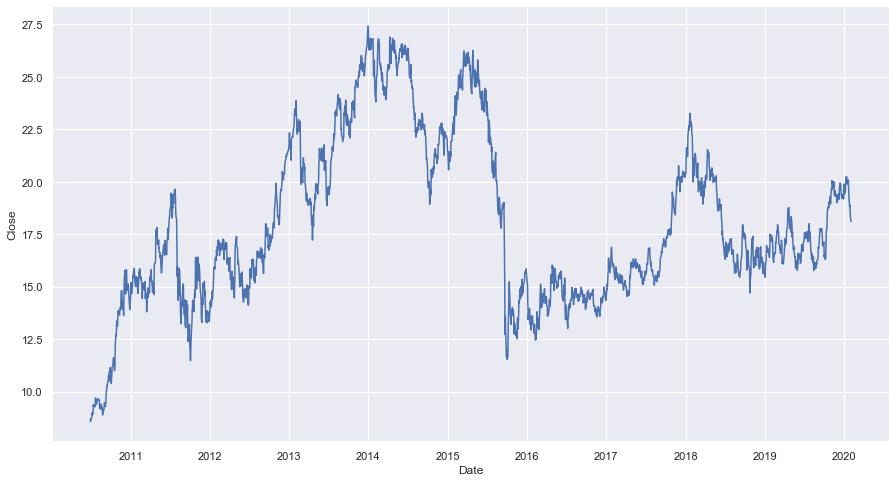

In [22]:
plt.figure(figsize=(15,8))
sns.lineplot(volkswagen_stockdata.index,volkswagen_stockdata['Close'])

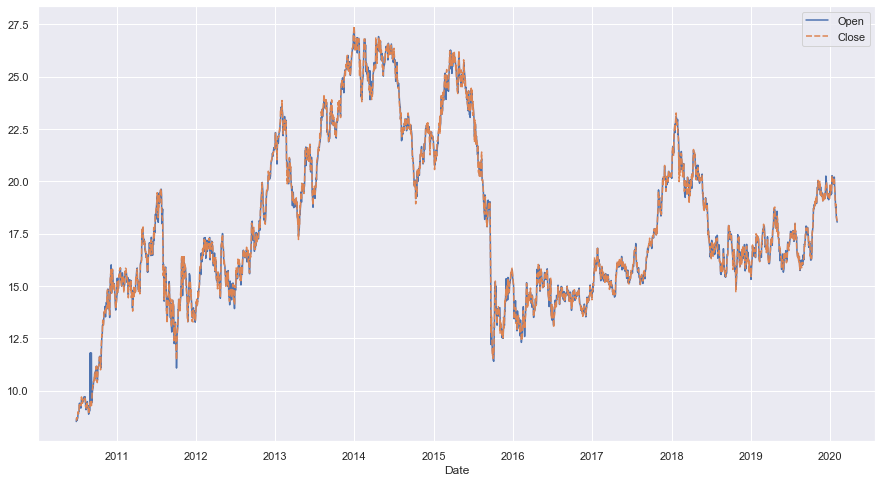

In [23]:
stocks = pd.DataFrame({'Open':volkswagen_stockdata['Open'],'Close':volkswagen_stockdata['Close']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

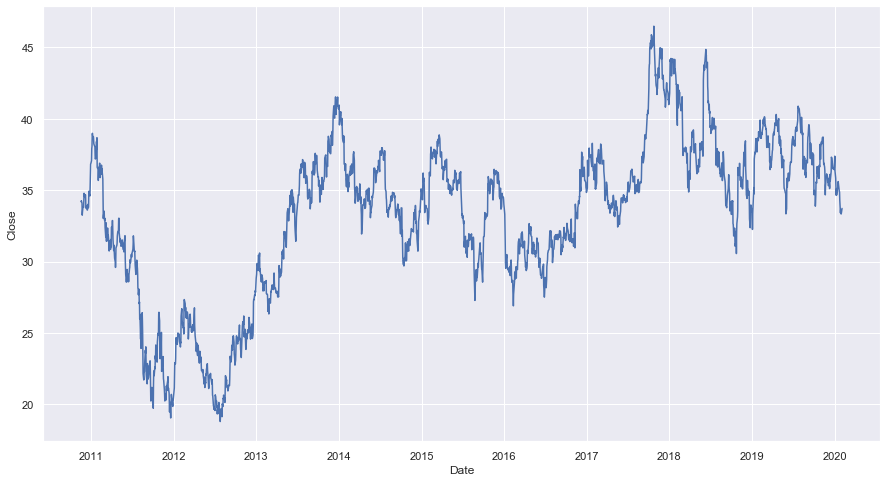

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(generalmotors_stockdata.index,generalmotors_stockdata['Close'])

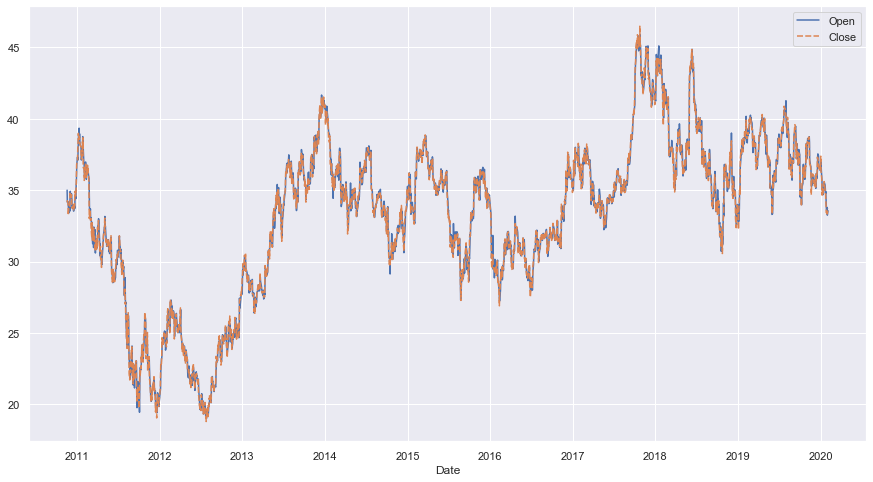

In [25]:
stocks = pd.DataFrame({'Open':generalmotors_stockdata['Open'],'Close':generalmotors_stockdata['Close']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

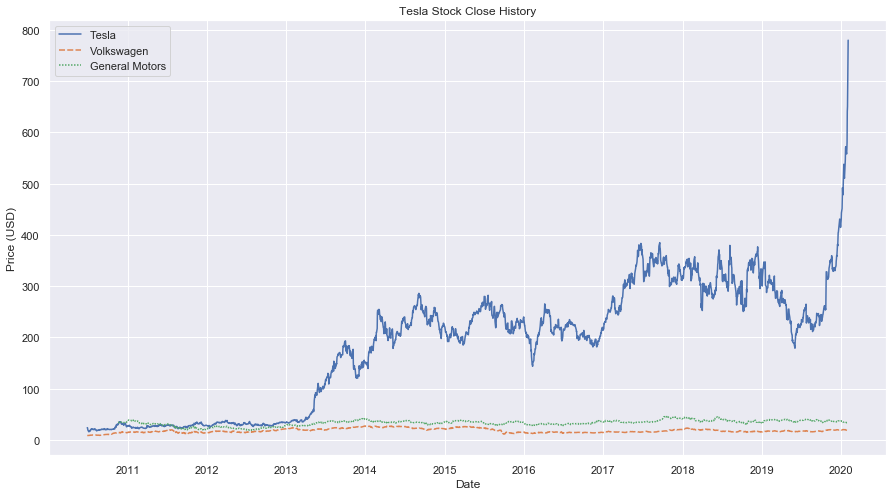

In [26]:
stocks = pd.DataFrame({'Tesla':tesla_stockdata['Close'],'Volkswagen':volkswagen_stockdata['Close'],
                       'General Motors':generalmotors_stockdata['Close']})
plt.figure(figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.title('Tesla Stock Close History')
sns.lineplot(data=stocks)

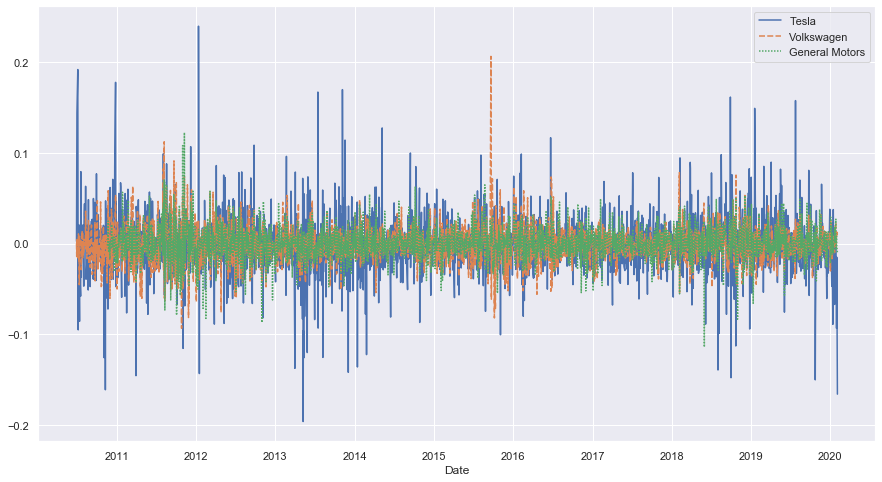

In [27]:
stocks = pd.DataFrame({'Tesla':tesla_stockdata['Daily Returns'],'Volkswagen':volkswagen_stockdata['Daily Returns'],
                       'General Motors':generalmotors_stockdata['Daily Returns']})
plt.figure(figsize=(15,8))
sns.lineplot(data=stocks)

### Tesla Stock Price Prediction using LSTM

In [28]:
# Scaling and Splitting the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

cols_to_train = ["Open","High","Low","Close","Volume"]
train_dataset, test_dataset = train_test_split(tesla_stockdata, train_size=0.9, test_size=0.1, shuffle=False)
print("Train {} and Test size {}".format(len(train_dataset), len(test_dataset)))

# append last 60 days of data from the train dataset
last60days = train_dataset.tail(60)
test_dataset = last60days.append(test_dataset)

# scale the feature 
x = train_dataset.loc[:,cols_to_train].values
scaler = MinMaxScaler()
scaled_traindata = scaler.fit_transform(x)
scaled_testdata = scaler.transform(test_dataset.loc[:,cols_to_train])

Train 2174 and Test size 242


In [29]:
test_dataset.shape

(302, 8)

In [30]:
scaled_traindata, scaled_testdata

(array([[0.00771826, 0.02244089, 0.00702583, 0.02191224, 0.50337694],
        [0.02604237, 0.0369725 , 0.02283393, 0.02174973, 0.46074816],
        [0.02391041, 0.02490751, 0.01451821, 0.01668472, 0.21865873],
        ...,
        [0.79937931, 0.79393   , 0.79751352, 0.79190144, 0.13559308],
        [0.77517205, 0.77789694, 0.78497131, 0.77998372, 0.13719112],
        [0.77819457, 0.78119473, 0.79293023, 0.79111594, 0.10220972]]),
 array([[0.91809471, 0.93870989, 0.92735406, 0.91459914, 0.25888234],
        [0.87872082, 0.89326506, 0.87430355, 0.89840192, 0.21287933],
        [0.9063824 , 0.90211277, 0.88486974, 0.87321236, 0.12331626],
        ...,
        [1.66314932, 1.7004934 , 1.65496608, 1.69287648, 0.77977833],
        [1.68360544, 1.70617734, 1.69481574, 1.71931204, 0.42112651],
        [1.77452435, 2.06314024, 1.80733872, 2.06988082, 1.26726935]]))

In [31]:
# Creating the time series data
TIMESTEPS = 60
target_col_index =3
def create_timeseries(scaled_data):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    #dim0 = mat.shape[0] - TIMESTEPS
    #dim1 = mat.shape[1]
    #x = np.zeros((dim0, TIMESTEPS, dim1))
    #y = np.zeros((dim0,))
    input_data = []
    target_data = []
    for i in range(TIMESTEPS,scaled_data.shape[0]):
        input_data.append(scaled_data[i-TIMESTEPS:i])
        target_data.append(scaled_data[i,3])
    #for i in range(dim0):
        #x[i] = mat[i:TIMESTEPS+i]
        #y[i] = mat[TIMESTEPS+i, target_col_index]
    input_data , target_data = np.array(input_data), np.array(target_data)
    print("length of time-series input/target",input_data.shape,target_data.shape)
    return input_data,target_data
    #return x, y

In [32]:
x_train, y_train = create_timeseries(scaled_traindata)

length of time-series input/target (2114, 60, 5) (2114,)


In [33]:
x_test, y_test = create_timeseries(scaled_testdata)

length of time-series input/target (242, 60, 5) (242,)


#### Building the LSTM model

In [34]:
import tensorflow as tf

In [35]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(60, activation='relu', return_sequences = True, input_shape=(x_train.shape[1],5)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(60, activation='relu', return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(80, activation='relu', return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
#lr = 0.00010000
#optimizer = tf.keras.optimizers.RMSprop(lr=lr)
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [37]:
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=40, min_delta=0.0001)
history = lstm_model.fit(x_train, y_train, epochs=100, batch_size=32)

Train on 2114 samples
Epoch 1/100
2114/2114 [==============================] - 30s 14ms/sample - loss: 0.0458
Epoch 2/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0059
Epoch 3/100
2114/2114 [==============================] - 18s 8ms/sample - loss: 0.0054
Epoch 4/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0053
Epoch 5/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0053
Epoch 6/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0046
Epoch 7/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0045
Epoch 8/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0040
Epoch 9/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0046
Epoch 10/100
2114/2114 [==============================] - 18s 8ms/sample - loss: 0.0042
Epoch 11/100
2114/2114 [==============================] - 18s 8ms/sample - loss: 0.0037
Epoch 12/100
2114/

2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0014
Epoch 94/100
2114/2114 [==============================] - 18s 8ms/sample - loss: 0.0014
Epoch 95/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0014
Epoch 96/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0013
Epoch 97/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0013
Epoch 98/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0014
Epoch 99/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0015
Epoch 100/100
2114/2114 [==============================] - 17s 8ms/sample - loss: 0.0013


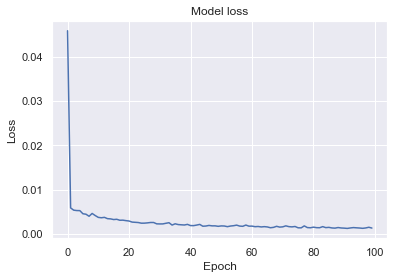

In [38]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
predictions = lstm_model.predict(x_test)

In [40]:
scaler.scale_

array([2.69869111e-03, 2.68110901e-03, 2.74446300e-03, 2.70855905e-03,
       2.69939048e-08])

In [41]:
#predictions = scaler.inverse_transform(predictions)
#actualoutcome = scaler.inverse_transform(y_test)
scale = 1/2.70855905e-03

predictions = predictions*scale
actualoutcome = y_test*scale

In [42]:
comparison = pd.DataFrame(actualoutcome, columns=['Actual Values'])
comparison['Predicted Values'] = predictions
comparison.head(10)

,Actual Values,Predicted Values
0,289.840015,283.423920
1,286.759998,283.096832
2,275.430011,281.330261
3,278.909991,276.954987
4,282.969989,273.805756
5,282.059985,274.859955
6,298.939990,275.731232
7,304.080005,284.531677
8,278.990009,295.021423
9,269.559985,291.737274


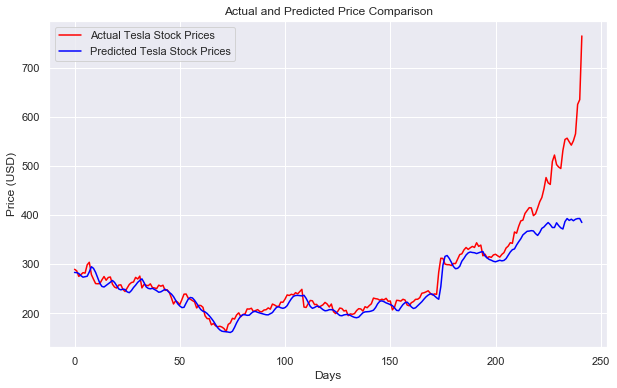

In [43]:
plt.figure(figsize=(10,6))
plt.plot(actualoutcome, color='red', label='Actual Tesla Stock Prices')
plt.plot(predictions, color='blue', label='Predicted Tesla Stock Prices')
plt.title('Actual and Predicted Price Comparison')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Improved Model